In [2]:
import pandas as pd
import json
import random
import spacy
from spacy.tokens import DocBin
import matplotlib.pyplot as plt

In [3]:
# 1. Loading the combined data in csv
df = pd.read_csv("combined_data.csv")

In [4]:
df.head()

,STATE/UT NAME,DISTRICT NAME,SUB-DISTRICT NAME,Area Name
0,MIZORAM,Mamit,Mamit,Mamit
1,MIZORAM,Mamit,Zawlnuam,Zawlnuam
2,MIZORAM,Mamit,Zawlnuam,Zawlnuam (NT)
3,MIZORAM,Mamit,Zawlnuam,Mamit (NT)
4,MIZORAM,Mamit,West Phaileng,West Phaileng


In [5]:
df.shape

(634121, 4)

In [6]:
df.describe()

,STATE/UT NAME,DISTRICT NAME,SUB-DISTRICT NAME,Area Name
count,634121,634121,634121,634121
unique,72,916,8189,447161
top,Uttar Pradesh,Paschim Medinipur,Fatehpur,Rampur
freq,65530,5748,1567,681


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634121 entries, 0 to 634120
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   STATE/UT NAME      634121 non-null  object
 1   DISTRICT NAME      634121 non-null  object
 2   SUB-DISTRICT NAME  634121 non-null  object
 3   Area Name          634121 non-null  object
dtypes: object(4)
memory usage: 19.4+ MB


In [8]:
#Check for missing values
print(df.isnull().sum())

#Drop rows with missing valiues and place it in a new variable "df_cleaned"
df_cleaned = df.dropna()

STATE/UT NAME        0
DISTRICT NAME        0
SUB-DISTRICT NAME    0
Area Name            0
dtype: int64


In [9]:
#Identify duplicates
print(df.duplicated().sum())

#Remove duplicates
df_no_duplicates = df.drop_duplicates()

print(df.dtypes)
df.shape
df.describe()

11477
STATE/UT NAME        object
DISTRICT NAME        object
SUB-DISTRICT NAME    object
Area Name            object
dtype: object


,STATE/UT NAME,DISTRICT NAME,SUB-DISTRICT NAME,Area Name
count,634121,634121,634121,634121
unique,72,916,8189,447161
top,Uttar Pradesh,Paschim Medinipur,Fatehpur,Rampur
freq,65530,5748,1567,681


In [10]:
df.shape

(634121, 4)

**Analysis of Data Distribution**

In [11]:
# Frequency counts for each geographical level
print("**Town Frequency Counts:**")
print(df['Area Name'].value_counts())

print("\n**Subdistrict Frequency Counts:**")
print(df['SUB-DISTRICT NAME'].value_counts())

print("\n**District Frequency Counts:**")
print(df['DISTRICT NAME'].value_counts())

print("\n**State Frequency Counts:**")
print(df['STATE/UT NAME'].value_counts())

**Town Frequency Counts:**
Area Name
Rampur             681
Gopalpur           535
Narayanpur         312
Mohanpur           290
Raghunathpur       268
                  ... 
Bhimchak             1
Bhimchabarkhori      1
Bhawanichauki        1
Bharathakol          1
Uttar Goalpara       1
Name: count, Length: 447161, dtype: int64

**Subdistrict Frequency Counts:**
SUB-DISTRICT NAME
Fatehpur        1567
Harraiya        1563
Basti           1184
Phuloni         1159
Sagri           1047
                ... 
Chhendipada        1
Industrial         1
Jarapada           1
Bikrampur          1
Jakholi            1
Name: count, Length: 8189, dtype: int64

**District Frequency Counts:**
DISTRICT NAME
Paschim Medinipur    5748
Azamgarh             4260
Mayurbhanj           4004
Kangra               3939
Bankura              3832
                     ... 
TELANGANA               1
konaseema               1
WEST BENGAL             1
UTTARAKHAND             1
MAHARASHTRA             1
Name: count,

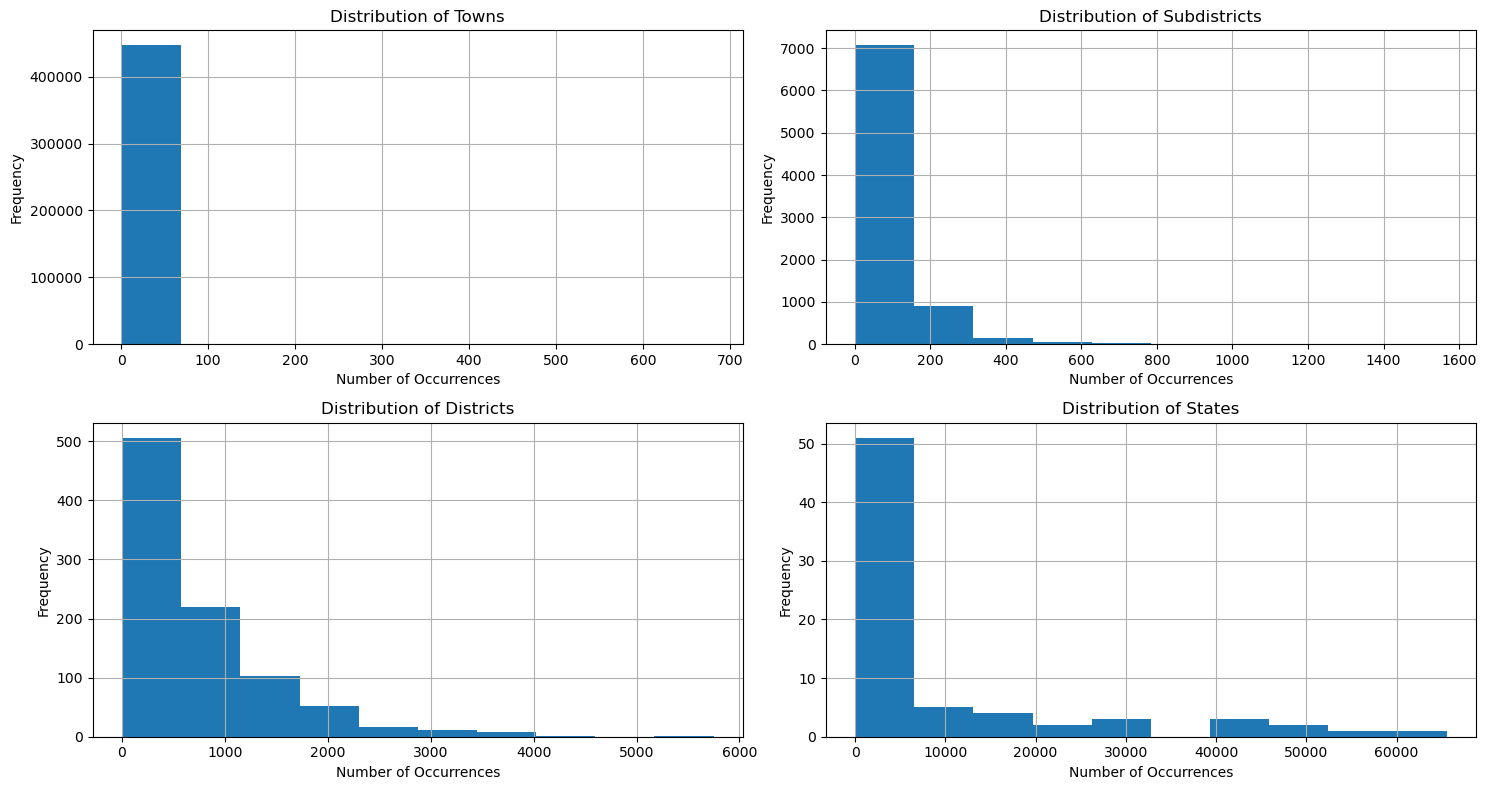

In [12]:
import matplotlib.pyplot as plt
# Plotting histograms for each category
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
df['Area Name'].value_counts().hist()
plt.title('Distribution of Towns')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
df['SUB-DISTRICT NAME'].value_counts().hist()
plt.title('Distribution of Subdistricts')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
df['DISTRICT NAME'].value_counts().hist()
plt.title('Distribution of Districts')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
df['STATE/UT NAME'].value_counts().hist()
plt.title('Distribution of States')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

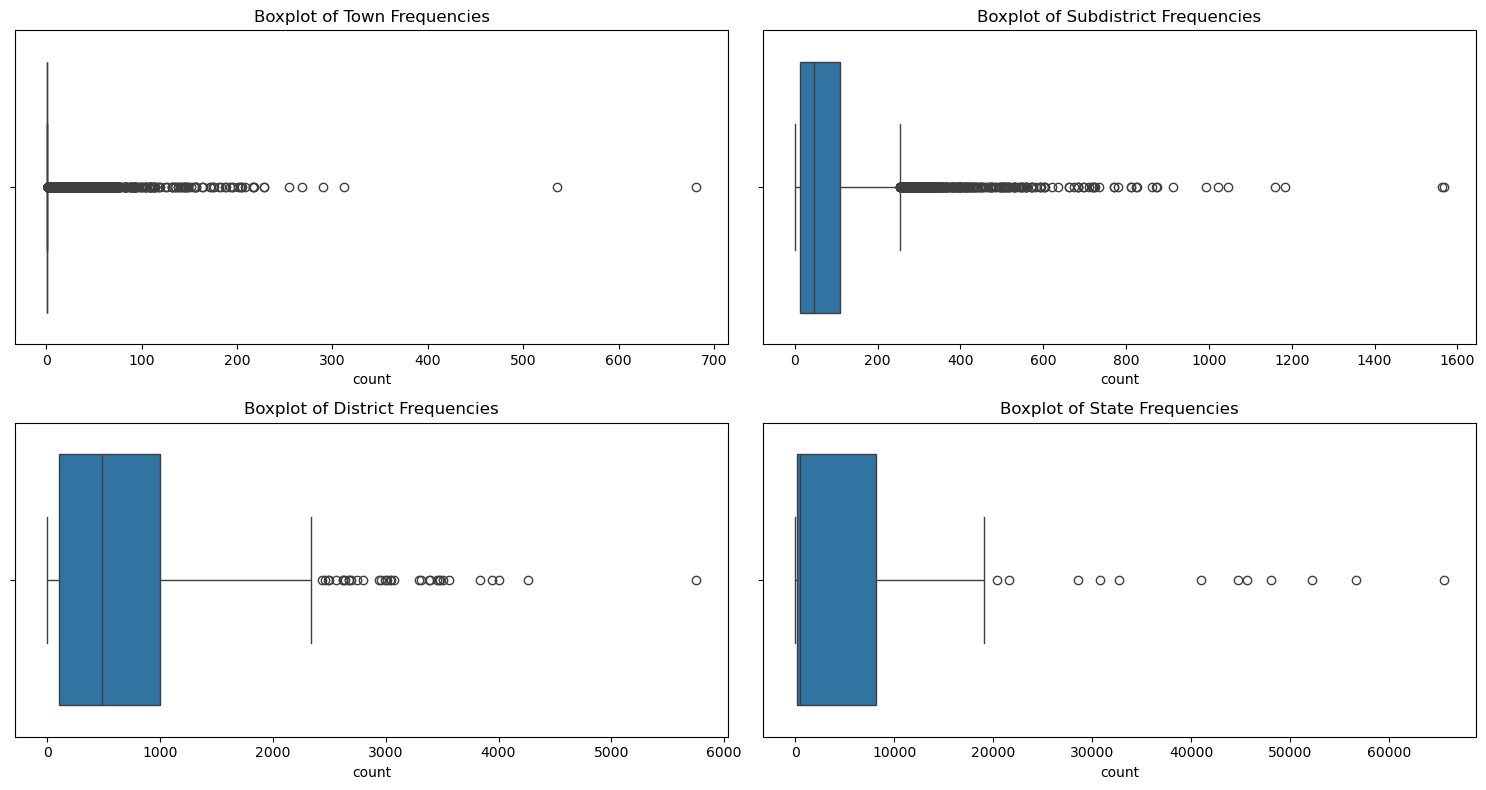

In [13]:
import seaborn as sns
# Box plots
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=df['Area Name'].value_counts())
plt.title('Boxplot of Town Frequencies')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['SUB-DISTRICT NAME'].value_counts())
plt.title('Boxplot of Subdistrict Frequencies')


plt.subplot(2, 2, 3)
sns.boxplot(x=df['DISTRICT NAME'].value_counts())
plt.title('Boxplot of District Frequencies')

plt.subplot(2, 2, 4)
sns.boxplot(x=df['STATE/UT NAME'].value_counts())
plt.title('Boxplot of State Frequencies')
plt.tight_layout()
plt.show()

In [14]:
df.to_csv("preprocessed.csv",index = False)